Name: Heru Leonardo

**A team of plantation planners are concerned about the yield of oil palm trees, which seems to 
fluctuate. They have collected a set of data and needed help in analysing on how external 
factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of 
oil palm tree determines the FFB yield, and are linked to the external factors. Perform the 
analysis, which requires some study on the background of oil palm tree physiology.**

In [2]:
#main driver
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
from google.colab import drive
from keras.preprocessing import image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
# importing libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests # library to handle requests
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import math
import scipy.stats as stats 
from google.colab import files
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import scipy
import seaborn as sns

In [3]:
uploaded = files.upload()

Saving palm_ffb.csv to palm_ffb.csv


In [4]:
palmffb_df=pd.read_csv('palm_ffb.csv')

In [5]:
palmffb_df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [35]:
corr_palmffb = palmffb_df.corr()
corr_palmffb

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


In [7]:
palmffb_df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


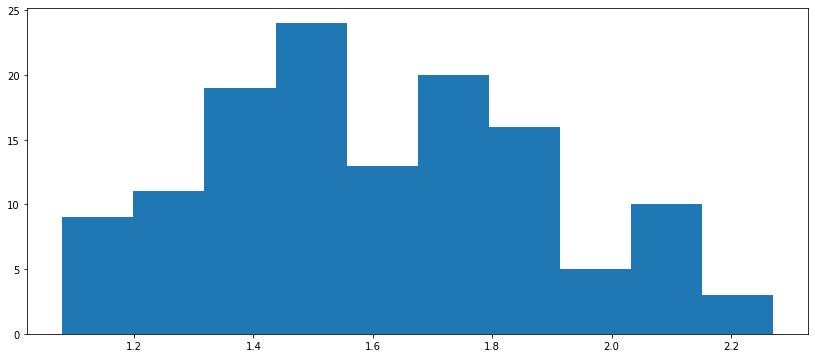

In [8]:
plt.figure(figsize=(14,6))
plt.hist(palmffb_df.FFB_Yield)
plt.show()

In [9]:
DataToTest = palmffb_df['FFB_Yield']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.98, p=0.096302278339862823486328125000
Normal distribution


In [10]:
palmffb_df.corr(method="pearson")

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


In [11]:
palmffb_df.corr(method="spearman")

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.611158,0.008096,-0.465575,0.534844,-0.055768,-0.346520,-0.053962
Average_Temp,-0.611158,1.000000,0.150144,0.735619,-0.313273,0.063742,0.496968,-0.036249
Min_Temp,0.008096,0.150144,1.000000,-0.164203,0.368256,-0.010767,-0.016674,0.084286
Max_Temp,-0.465575,0.735619,-0.164203,1.000000,-0.427017,-0.025549,0.330195,-0.110524
Precipitation,0.534844,-0.313273,0.368256,-0.427017,1.000000,0.076471,-0.276535,0.311944
Working_days,-0.055768,0.063742,-0.010767,-0.025549,0.076471,1.000000,0.045001,0.099606
HA_Harvested,-0.346520,0.496968,-0.016674,0.330195,-0.276535,0.045001,1.000000,-0.385903
FFB_Yield,-0.053962,-0.036249,0.084286,-0.110524,0.311944,0.099606,-0.385903,1.000000


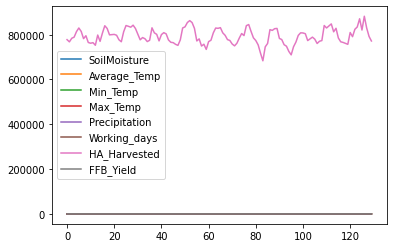

In [12]:
palmffb_df.plot()

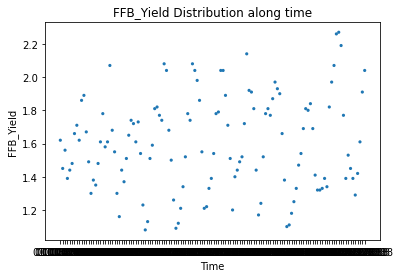

In [23]:
plt.scatter(palmffb_df['Date'], palmffb_df['FFB_Yield'], 
        cmap=plt.cm.Blues, edgecolor='none', 
        s=10)
plt.title('FFB_Yield Distribution along time')
plt.xlabel('Time')
plt.ylabel('FFB_Yield')
plt.show()

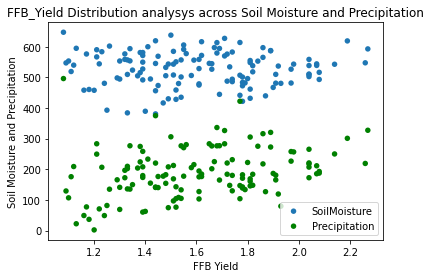

In [31]:
plt.scatter(palmffb_df['FFB_Yield'], palmffb_df['SoilMoisture'], label ='SoilMoisture',
        cmap=plt.cm.Blues, edgecolor='none', 
        s=30)
plt.scatter(palmffb_df['FFB_Yield'], palmffb_df['Precipitation'], c='green',label ='Precipitation', 
       edgecolor='none', s=30) 
plt.title('FFB_Yield Distribution analysys across Soil Moisture and Precipitation')
plt.xlabel('FFB Yield')
plt.ylabel('Soil Moisture and Precipitation')
plt.legend()
plt.show()

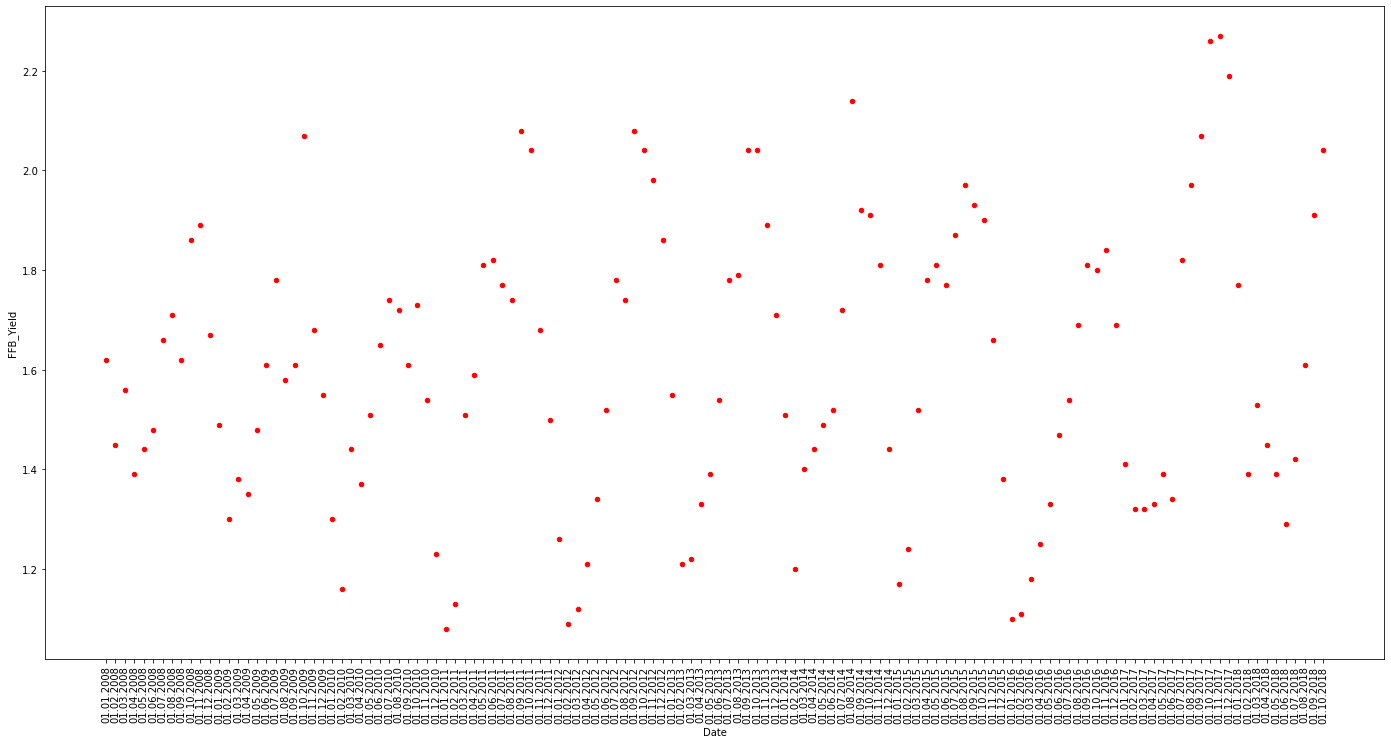

In [32]:
# palmffb_df.drop('HA_Harvested', inplace=True, axis=1)
palmffb_df.plot('Date','FFB_Yield',kind='scatter', figsize=(24, 12), rot=90,color='red') # rotate the bars by 90 degrees
plt.show()

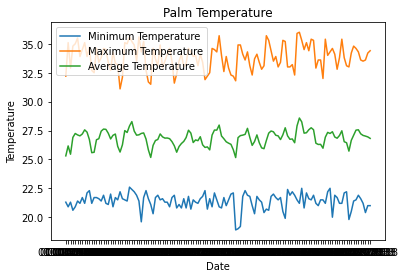

In [33]:
plt.plot(palmffb_df['Date'],palmffb_df['Min_Temp'],label='Minimum Temperature')
plt.plot(palmffb_df['Date'],palmffb_df['Max_Temp'],label='Maximum Temperature')
plt.plot(palmffb_df['Date'],palmffb_df['Average_Temp'],label='Average Temperature')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Palm Temperature')
plt.show()

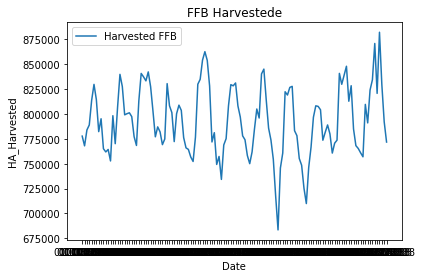

In [36]:
plt.plot(palmffb_df['Date'],palmffb_df['HA_Harvested'],label='Harvested FFB')
plt.legend()
plt.xlabel('Date')
plt.ylabel('HA_Harvested')
plt.title('FFB Harvestede')
plt.show()

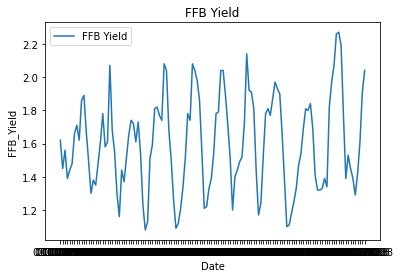

In [42]:
plt.plot(palmffb_df['Date'],palmffb_df['FFB_Yield'],label='FFB Yield')
plt.legend()
plt.xlabel('Date')
plt.ylabel('FFB_Yield')
plt.title('FFB Yield')
plt.show()

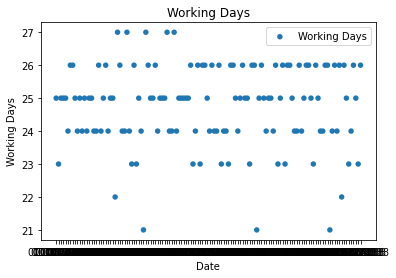

In [41]:
plt.scatter(palmffb_df['Date'], palmffb_df['Working_days'], label ='Working Days',
        cmap=plt.cm.Blues, edgecolor='none', 
        s=30)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Working Days')
plt.title('Working Days')
plt.show()

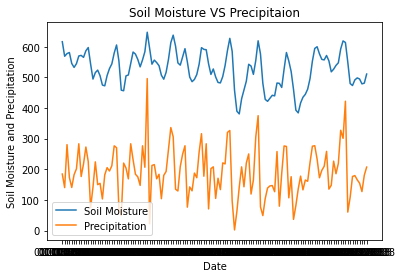

In [39]:
plt.plot(palmffb_df['Date'],palmffb_df['SoilMoisture'],label='Soil Moisture')
plt.plot(palmffb_df['Date'],palmffb_df['Precipitation'],label='Precipitation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Soil Moisture and Precipitation')
plt.title('Soil Moisture VS Precipitaion')
plt.show()

In General, There's just a little bit correlation FFB Yield with Soil Moisture and Precipitation other than that there's no correlation.

In [34]:
#featureset = palmffb_df[['SoilMoisture',  'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield']]

In [ ]:
#from scipy import ndimage 
#from scipy.cluster import hierarchy 
#from scipy.spatial import distance_matrix 
#from matplotlib import pyplot as plt 
#from sklearn import manifold, datasets 
#from sklearn.cluster import AgglomerativeClustering 
#from sklearn.datasets.samples_generator import make_blobs 
#agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
#agglom.fit(feature_mtx)
#agglom.labels_

In [ ]:
#palmffb_df['cluster_'] = agglom.labels_
#palmffb_df.head()

In [ ]:
# palmffb_df.drop(['Day'], axis = 1, inplace = True)
#palmffb_df['Day'] = mdates.DateFormatter('%Y %B')
#palmffb_df.head()

In [ ]:
#import matplotlib.cm as cm
#_clusters = max(agglom.labels_)+1
#colors = cm.rainbow(np.linspace(0, 1, n_clusters))
#cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
#plt.figure(figsize=(16,14))

#for color, label in zip(colors, cluster_labels):
#    subset = palmffb_df[palmffb_df.cluster_ == label]
#    for i in subset.index:
#            plt.text(subset.Working_days[i], subset.FFB_Yield[i],str(subset['Working_days'][i]), rotation=25) 
#    plt.scatter(subset.Working_days, subset.FFB_Yield, s= subset.Average_Temp*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
#plt.legend()
#plt.xticks(range(0,len(palmffb_df.index)), palmffb_df.index)
#plt.title('Clusters')
#plt.xlabel('Date')
#plt.ylabel('FFB Yield')
#plt.show()